In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 7s 3us/step


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

557056/550378 [==============================] - 10s 18us/step


In [6]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [8]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [11]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [15]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 122us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 66us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 65us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 65us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 65us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 65us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 65us/step - loss: 0.4581 - acc: 0.

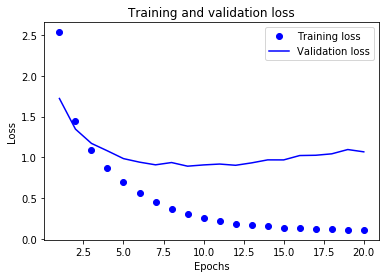

In [17]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

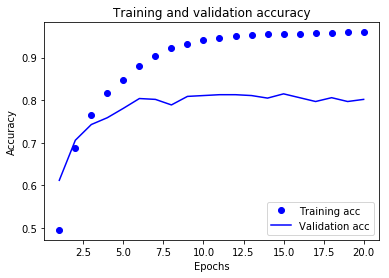

In [18]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [21]:
model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 102us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 1s 69us/step - loss: 1.3712 - acc: 0.7121 - val_loss: 1.2758 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 1s 66us/step - loss: 1.0136 - acc: 0.7781 - val_loss: 1.1303 - val_acc: 0.7530
Epoch 4/9
7982/7982 [==============================] - 1s 67us/step - loss: 0.7976 - acc: 0.8251 - val_loss: 1.0539 - val_acc: 0.7590
Epoch 5/9
7982/7982 [==============================] - 1s 66us/step - loss: 0.6393 - acc: 0.8624 - val_loss: 0.9754 - val_acc: 0.7920
Epoch 6/9
7982/7982 [==============================] - 1s 67us/step - loss: 0.5124 - acc: 0.8921 - val_loss: 0.9102 - val_acc: 0.8140
Epoch 7/9
7982/7982 [==============================] - 1s 67us/step - loss: 0.4124 - acc: 0.9137 - val_loss: 0.8932 - val_acc: 0.8210
Epoch 8/9
798

In [22]:
results

[1.022498272405813, 0.7756010686194165]

In [23]:
import copy

In [24]:
test_labels_copy = copy.copy(test_labels)

In [25]:
np.random.shuffle(test_labels_copy)

In [26]:
hits_array = np.array(test_labels) == np.array(test_labels_copy)

In [27]:
float(np.sum(hits_array)) / len(test_labels)

0.182546749777382

In [28]:
predictions = model.predict(x_test)

In [29]:
predictions[0].shape

(46,)

In [30]:
np.sum(predictions[0])

0.99999976

In [31]:
np.argmax(predictions[0])

3

In [32]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [34]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [36]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 131us/step - loss: 2.4715 - acc: 0.4980 - val_loss: 1.8520 - val_acc: 0.5960
Epoch 2/20
7982/7982 [==============================] - 1s 100us/step - loss: 1.6668 - acc: 0.6161 - val_loss: 1.6007 - val_acc: 0.6280
Epoch 3/20
7982/7982 [==============================] - 1s 104us/step - loss: 1.4295 - acc: 0.6564 - val_loss: 1.4855 - val_acc: 0.6520
Epoch 4/20
7982/7982 [==============================] - 1s 103us/step - loss: 1.2656 - acc: 0.6823 - val_loss: 1.4021 - val_acc: 0.6770
Epoch 5/20
7982/7982 [==============================] - 1s 100us/step - loss: 1.1230 - acc: 0.7132 - val_loss: 1.3736 - val_acc: 0.6710
Epoch 6/20
7982/7982 [==============================] - 1s 100us/step - loss: 1.0055 - acc: 0.7256 - val_loss: 1.2977 - val_acc: 0.6830
Epoch 7/20
7982/7982 [==============================] - 1s 101us/step - loss: 0.9076 - acc: 0.7334 - val_loss: 1.3017 - val_acc: 0.6880


In [37]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 202us/step - loss: 1.5676 - acc: 0.6660 - val_loss: 1.0813 - val_acc: 0.7610
Epoch 2/20
7982/7982 [==============================] - 1s 163us/step - loss: 0.7711 - acc: 0.8296 - val_loss: 0.9412 - val_acc: 0.8110
Epoch 3/20
7982/7982 [==============================] - 1s 164us/step - loss: 0.4624 - acc: 0.8989 - val_loss: 0.8272 - val_acc: 0.8280
Epoch 4/20
7982/7982 [==============================] - 1s 165us/step - loss: 0.2983 - acc: 0.9341 - val_loss: 0.9672 - val_acc: 0.8020
Epoch 5/20
7982/7982 [==============================] - 1s 165us/step - loss: 0.2271 - acc: 0.9439 - val_loss: 0.9536 - val_acc: 0.8070
Epoch 6/20
7982/7982 [==============================] - 1s 163us/step - loss: 0.1881 - acc: 0.9513 - val_loss: 0.9120 - val_acc: 0.8210
Epoch 7/20
7982/7982 [==============================] - 1s 164us/step - loss: 0.1681 - acc: 0.9548 - val_loss: 0.9235 - val_acc: 0.8200


In [38]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 139us/step - loss: 1.8237 - acc: 0.6368 - val_loss: 1.2089 - val_acc: 0.7240
Epoch 2/20
7982/7982 [==============================] - 1s 105us/step - loss: 0.9351 - acc: 0.8013 - val_loss: 0.9629 - val_acc: 0.8060
Epoch 3/20
7982/7982 [==============================] - 1s 106us/step - loss: 0.6370 - acc: 0.8702 - val_loss: 0.8665 - val_acc: 0.8190
Epoch 4/20
7982/7982 [==============================] - 1s 106us/step - loss: 0.4533 - acc: 0.9048 - val_loss: 0.8243 - val_acc: 0.8310
Epoch 5/20
7982/7982 [==============================] - 1s 106us/step - loss: 0.3372 - acc: 0.9268 - val_loss: 0.8115 - val_acc: 0.8280
Epoch 6/20
7982/7982 [==============================] - 1s 105us/step - loss: 0.2627 - acc: 0.9411 - val_loss: 0.8147 - val_acc: 0.8350
Epoch 7/20
7982/7982 [==============================] - 1s 104us/step - loss: 0.2156 - acc: 0.9489 - val_loss: 0.8712 - val_acc: 0.8260


In [39]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 154us/step - loss: 1.8562 - acc: 0.6254 - val_loss: 1.2617 - val_acc: 0.7090
Epoch 2/9
7982/7982 [==============================] - 1s 107us/step - loss: 0.9897 - acc: 0.7744 - val_loss: 1.0590 - val_acc: 0.7550
Epoch 3/9
7982/7982 [==============================] - 1s 106us/step - loss: 0.6725 - acc: 0.8514 - val_loss: 1.0297 - val_acc: 0.7750
Epoch 4/9
7982/7982 [==============================] - 1s 107us/step - loss: 0.4602 - acc: 0.9008 - val_loss: 0.9321 - val_acc: 0.8020
Epoch 5/9
7982/7982 [==============================] - 1s 108us/step - loss: 0.3343 - acc: 0.9268 - val_loss: 1.0353 - val_acc: 0.7950
Epoch 6/9
7982/7982 [==============================] - 1s 108us/step - loss: 0.2598 - acc: 0.9421 - val_loss: 1.2146 - val_acc: 0.7780
Epoch 7/9
7982/7982 [==============================] - 1s 107us/step - loss: 0.2162 - acc: 0.9483 - val_loss: 1.1791 - val_acc: 0.7700
Epoch 8